# Logistic Regression

## Wisconsin Breast Cancer Dataset

We will use the [Wisconsin breast cancer](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html) dataset to demonstrate Logistic Regression. [Βreast cancer](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html) is a toy dataset of scikit-learn that includes binary classifications (benign / malignant) of 569 cancer tumors depending on 30 characteristics (features, or input variables).


In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()


Let's look at the official description of the dataset. This description provides information on the number of samples (569) and their characteristics (30).



In [2]:
# Display a description of the dataset: 30 features, 569 training examples.
# print(dataset.DESCR)


Now let us examine the names and the values of the input variables (features) of the dataset. We begin with their names...


In [3]:
# Display the names of the 30 features of the dataset.
print(dataset.feature_names)


['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


...and here are their values:

In [4]:
# Display the values of the 30 features of the dataset (shape: 569 x 30).
print(dataset.data)


[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


Below we print the target variables (that is, the tumor characterizations) of the 569 samples of the dataset. This is a classification problem. In such types of problems, we usually refer to the target variables as class labels. According to the information printed below, 0 represents the malignant cases and 1 the benign cases. Therefore, this dataset is suitable for research on binary classification problems.


In [5]:
# Print the values of the target variables (i.e. the class labels of the 569 tumors)
# print(dataset.target)


## Logistic Regression with a single input variable

We begin our analysis by choosing a subset of the features of the Breast Cancer dataset. At first, why don't we apply Logistic Regression directly to all of them?

* For educational purposes: We desire to visualize the results and this is only possible with one or two features.
* For practical reasons: In large datasets with a large number of dimensions there is a risk of encountering the curse of dimensionality (not here).

The entire dataset will be fed into a Logistic Regression model at the last part of this notebook. For the moment, we will create three independent subsets of the original input variables that reside in the `dataset.data` list. Each subset  includes just one feature; the rest 29 features are discarded. More specifically, we will experiment with `worst concave points`, `worst perimeter`, and `mean concave points`, respectively. These three features have been deliberately selected after the application of feature selection techniques that will be demonstrated in future notebooks.


### Vizualizing the selected features

Let us create some scatter plots to illustrate the feature values against the target variable. We begin with `worst concave points`.


In [6]:
import matplotlib.patches as mpatches

Y = np.array(dataset.target)               # Target variables (class labels)

X = np.array(dataset.data)                 # All input variables
X_WCP = np.array(dataset.data[:, 27:28])   # A "randomly selected" feature: worst concave points in column
X_WP = np.array(dataset.data[:, 22:23])    # Another "randomly selected" feature: worst perimeter in column
X_MCP = np.array(dataset.data[:, 7:8])     # A third "randomly selected" feature: mean concave points in column

# Setup the colors for the Figures
colors = { 0:'red', 1:'blue' }
ecolors = [ colors[y] for y in Y ]
red = mpatches.Patch(color='red', label='malignant')
blue = mpatches.Patch(color='blue', label='benign')


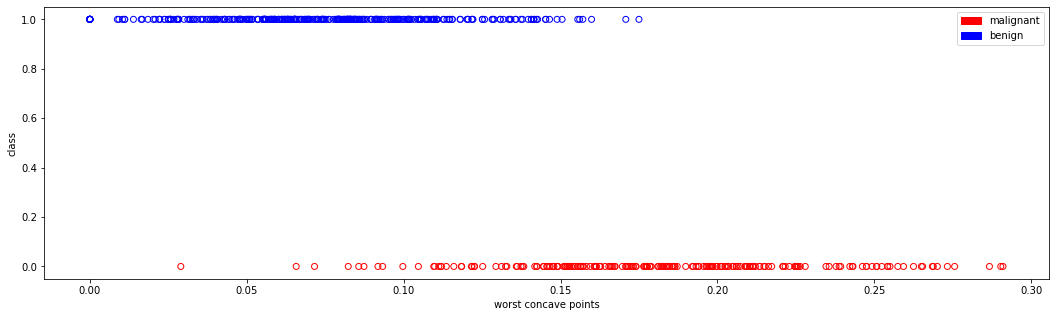

In [7]:
fig = plt.figure(figsize=(18, 5))
plt.scatter(X_WCP, Y, facecolors='none', edgecolors=ecolors, cmap=colors)
plt.xlabel('worst concave points')
plt.ylabel('class')
plt.legend(handles=[red, blue], loc=1)


In this case, the correlation of the selected feature and the class label is obvious: the higher the value of `worst concave points`, the more frequent the malignant tumors become (and vice versa).

Now let us examine visually  the correlation of another feature, `worst perimeter`, with the class labels.


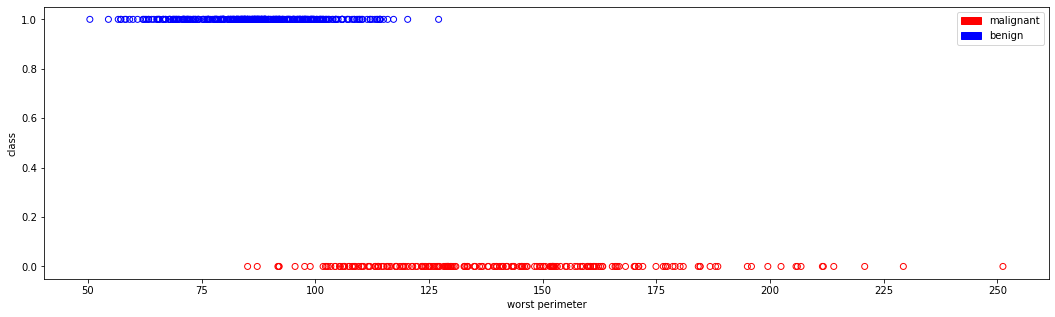

In [8]:
fig = plt.figure(figsize=(18, 5))
plt.scatter(X_WP, Y, facecolors='none', edgecolors=ecolors, cmap=colors)
plt.xlabel('worst perimeter')
plt.ylabel('class')
plt.legend(handles=[red, blue], loc=1)


The connection of `worst perimeter` with the class label seems stronger than in the previous case. Below we visualize `mean concave points` against the class labels.


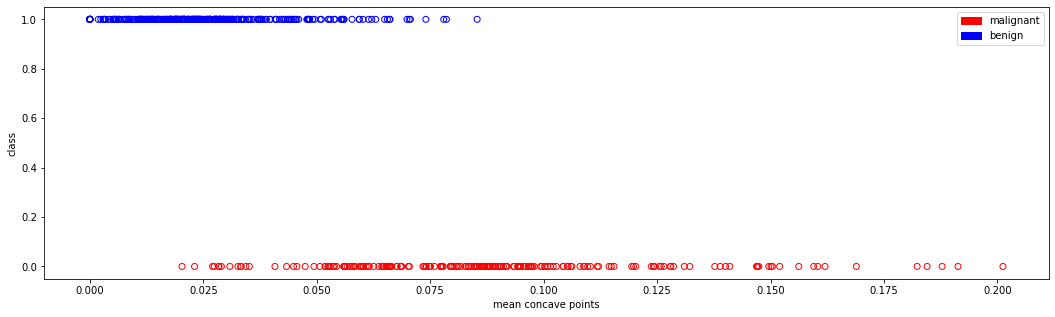

In [9]:
fig = plt.figure(figsize=(18, 5))
plt.scatter(X_MCP, Y, facecolors='none', edgecolors=ecolors, cmap=colors)
plt.xlabel('mean concave points')
plt.ylabel('class')
plt.legend(handles=[red, blue], loc=1)


### Training and testing the Logistic Regression models

Let us now train three Logistic Regression models. In the first, second, and third model the training set will contain only the `worst concave points`, `worst perimeter`, and `mean concave points` features respectively. Of course, the training set will also include the class labels of the tumors.

In the following code we encounter a number of important methods and objects:

* [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html): This function will be studied in more details in future notebooks. For now, its arguments are: i) the original input variables, ii) the original target variables, and iii) the size of the test set as a percent of the original dataset. The output consists of 4 arrays: the input and target variables for training the model, and the input and target variables for testing the trained model.
* [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html): The scikit-learn's implementation of the regularized Logistic Regression. Note that regularization is applied by default. The object may receive a number of parameters as shown in the official documentation. A small portion of them includes:
 * `fit_intercept`: Whether to calculate the intercept for this model. If set to `False`, no intercept will be used in calculations (i.e. data is expected to be centered).
 * `n_jobs`: The number of jobs to use for the computation. This will only provide speedup in case of sufficiently large problems.
 * `multi_class{'auto', 'ovr', 'multinomial'}, default='auto'`: If the option chosen is `ovr`, then a binary problem is fit for each label. For `multinomial` the minimized loss is the multinomial loss fit across the entire probability distribution, even when the data is binary. `multinomial` is unavailable when `solver='liblinear'`. On the other hand, `auto` selects `ovr` if the data is binary, or if `solver='liblinear'`, and otherwise selects `multinomial`.

* Moreover, the [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) model supports a number of methods. The ones that are used here are:

 * `fit()`: fit (that is, train) the linear model.
 * `predict(test)`: make predictions on the input variables of the test set by using the learned linear model.


In [10]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model

from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Split the dataset into a training and a test set. The sizes of the test and training sets will be the 30% and 70%
# of the original dataset, respectively.
X_WCP_train, X_WCP_test, Y_WCP_train, Y_WCP_test = train_test_split(X_WCP, Y, test_size=0.3, random_state=1, stratify=Y)

# # Create a Logistic Regression model
model_1 = linear_model.LogisticRegression()

# Train the model by using the training examples (input and target variables).
model_1.fit(X_WCP_train, Y_WCP_train)

# Test the model. The cancer_predval array contains the model's predictions.
cancer_predval_1 = model_1.predict_proba(X_WCP_test)

cancer_pred_1 = model_1.predict(X_WCP_test)

# Evaluate the model by comparing the predicted tumor classes with the real ones.
# Compute the MSE, Accuracy, Precision, Recall, and F1 metrics.
mse_1 = mean_squared_error(Y_WCP_test, cancer_pred_1)
acc_1 = accuracy_score(Y_WCP_test, cancer_pred_1)
prec_1 = precision_score(Y_WCP_test, cancer_pred_1)
rec_1 = recall_score(Y_WCP_test, cancer_pred_1)
F1_1 = f1_score(Y_WCP_test, cancer_pred_1)

print("Logistic Regression Evaluation: Model 1")
print("\tMean Squared Error: ", mse_1)
print("\tAccuracy: ", acc_1)
print("\tPrecision: ", prec_1)
print("\tRecall: ", rec_1)
print("\tF1 score: ", F1_1)

print("\nPredicted values:\t", np.around(cancer_predval_1[0:10,1].reshape(1,-1), 3))
print("Predicted classes:\t", cancer_pred_1[0:10].reshape(1,-1))
print("Real classes:\t\t", Y_WCP_test[0:10].reshape(1,-1))

print("\n === Classification Report")
from sklearn.metrics import classification_report
print(classification_report(Y_WCP_test, cancer_pred_1, target_names={"Malignant", "Benign"}))

print("\n === Confusion Matrix")
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_WCP_test, cancer_pred_1))

print("\n === Confusion Matrix")
from sklearn.metrics import multilabel_confusion_matrix
print(multilabel_confusion_matrix(Y_WCP_test, cancer_pred_1))


Logistic Regression Evaluation: Model 1
	Mean Squared Error:  0.24561403508771928
	Accuracy:  0.7543859649122807
	Precision:  0.7181208053691275
	Recall:  1.0
	F1 score:  0.8359375

Predicted values:	 [[0.496 0.653 0.763 0.44  0.573 0.533 0.726 0.546 0.748 0.563]]
Predicted classes:	 [[0 1 1 0 1 1 1 1 1 1]]
Real classes:		 [[0 1 1 0 0 0 1 0 1 0]]

 === Classification Report
              precision    recall  f1-score   support

   Malignant       1.00      0.34      0.51        64
      Benign       0.72      1.00      0.84       107

    accuracy                           0.75       171
   macro avg       0.86      0.67      0.67       171
weighted avg       0.82      0.75      0.71       171


 === Confusion Matrix
[[ 22  42]
 [  0 107]]

 === Confusion Matrix
[[[107   0]
  [ 42  22]]

 [[ 22  42]
  [  0 107]]]


In [11]:
# Train Logistic Regression with 'worst perimeter' being the only feature
X_WP_train, X_WP_test, Y_WP_train, Y_WP_test = train_test_split(X_WP, Y, test_size = 0.3, random_state=1, stratify=Y)

model_2 = linear_model.LogisticRegression()
model_2.fit(X_WP_train, Y_WP_train)

cancer_predval_2 = model_2.predict_proba(X_WP_test)
cancer_pred_2 = model_2.predict(X_WP_test)

mse_2 = mean_squared_error(Y_WP_test, cancer_pred_2)
acc_2 = accuracy_score(Y_WP_test, cancer_pred_2)
prec_2 = precision_score(Y_WP_test, cancer_pred_2)
rec_2 = recall_score(Y_WP_test, cancer_pred_2)
F1_2 = f1_score(Y_WP_test, cancer_pred_2)

print("Logistic Regression Evaluation: Model 2")
print("\tMean Squared Error: ", mse_2)
print("\tAccuracy: ", acc_2)
print("\tPrecision: ", prec_2)
print("\tRecall: ", rec_2)
print("\tF1 score: ", F1_2)


Logistic Regression Evaluation: Model 2
	Mean Squared Error:  0.07602339181286549
	Accuracy:  0.9239766081871345
	Precision:  0.9272727272727272
	Recall:  0.9532710280373832
	F1 score:  0.9400921658986175


In [12]:
# Train Logistic Regression with 'mean concave points' being the only feature
X_MCP_train, X_MCP_test, Y_MCP_train, Y_MCP_test = train_test_split(X_MCP, Y, test_size=0.3, random_state=1, stratify=Y)

model_3 = linear_model.LogisticRegression()
model_3.fit(X_MCP_train, Y_MCP_train)

cancer_predval_3 = model_3.predict_proba(X_MCP_test)
cancer_pred_3 = model_3.predict(X_MCP_test)

mse_3 = mean_squared_error(Y_MCP_test, cancer_pred_3)
acc_3 = accuracy_score(Y_MCP_test, cancer_pred_3)
prec_3 = precision_score(Y_MCP_test, cancer_pred_3)
rec_3 = recall_score(Y_MCP_test, cancer_pred_3)
F1_3 = f1_score(Y_MCP_test, cancer_pred_3)

print("Logistic Regression Evaluation: Model 3")
print("\tMean Squared Error: ", mse_3)
print("\tAccuracy: ", acc_3)
print("\tPrecision: ", prec_3)
print("\tRecall: ", rec_3)
print("\tF1 score: ", F1_3)


Logistic Regression Evaluation: Model 3
	Mean Squared Error:  0.3684210526315789
	Accuracy:  0.631578947368421
	Precision:  0.6294117647058823
	Recall:  1.0
	F1 score:  0.7725631768953068


The best results were obtained by using the `worst perimeter` feature ($\text{MSE}\simeq 0.076$, $\text{Precision}\simeq 0.927$, $\text{Accuracy}\simeq 0.924$). The difference with the performance of the other two models was significant. More specifically, the utilization of `worst concave points` led to a higher error ($\text{MSE}\simeq 0.245$) and lower accuracy ($\text{Precision}\simeq 0.718$, $\text{Accuracy}\simeq 0.754$). Regarding `mean concave points`, the performance gap was even greater, since our third model achieved $\text{MSE}\simeq 0.368$, $\text{Precision}\simeq 0.629$, and $\text{Accuracy}\simeq 0.631$.

### Visualizing the results

In the three following diagrams we draw the sigmoid line that returns each of the three Logistic Regression models.


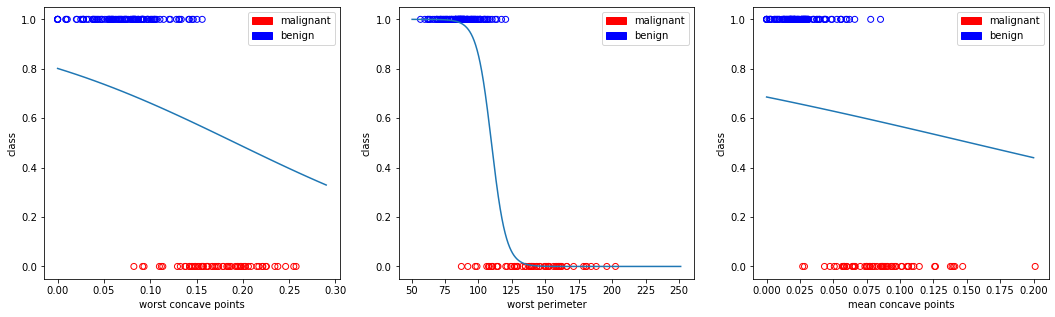

In [13]:
fig = plt.figure(figsize=(18, 5))

def sigmoid_1(x): return 1.0 / (1.0 + np.exp( -model_1.intercept_[0] - model_1.coef_[0][0] * x))
x1 = np.arange(X_WCP.min(), X_WCP.max(), 0.01)
y1 = [ sigmoid_1(n) for n in x1 ]
ecolors = [ colors[y] for y in Y_WCP_test ]

ax = fig.add_subplot(131)
ax.scatter(X_WCP_test, Y_WCP_test, facecolors='none', edgecolors=ecolors, cmap=colors)
ax.plot(x1, y1)
ax.set_xlabel('worst concave points')
ax.set_ylabel('class')
ax.legend(handles=[red, blue], loc=1)


def sigmoid_2(x): return 1.0 / (1.0 + np.exp( -model_2.intercept_[0] - model_2.coef_[0][0] * x))
x2 = np.arange(X_WP.min(), X_WP.max(), 0.1)
y2 = [ sigmoid_2(n) for n in x2 ]
ecolors = [ colors[y] for y in Y_WP_test ]

ax = fig.add_subplot(132)
ax.plot(x2, y2)
ax.scatter(X_WP_test, Y_WP_test, facecolors='none', edgecolors=ecolors, cmap=colors)
ax.set_xlabel('worst perimeter')
ax.set_ylabel('class')
ax.legend(handles=[red, blue], loc=1)


def sigmoid_3(x): return 1.0 / (1.0 + np.exp(-(model_3.intercept_[0] + (model_3.coef_[0][0] * x))))
x3 = np.arange(X_MCP.min(), X_MCP.max(), 0.01)
y3 = [ sigmoid_3(n) for n in x3 ]
ecolors = [ colors[y] for y in Y_MCP_test ]

ax = fig.add_subplot(133)
ax.plot(x3, y3)
ax.scatter(X_MCP_test, Y_MCP_test, facecolors='none', edgecolors=ecolors, cmap=colors)
ax.set_xlabel('mean concave points')
ax.set_ylabel('class')
ax.legend(handles=[red, blue], loc=1)


In [14]:
import pandas as pd

# RESULTS
str_1 = "y=1 / 1 + exp (- (" + str(round(model_1.coef_[0][0], 2)) + "x + " + str(round(model_1.intercept_[0], 2)) + "))"
str_2 = "y=1 / 1 + exp (- (" + str(round(model_2.coef_[0][0], 2)) + "x + " + str(round(model_2.intercept_[0], 2)) + "))"
str_3 = "y=1 / 1 + exp (- (" + str(round(model_3.coef_[0][0], 2)) + "x + " + str(round(model_3.intercept_[0], 2)) + "))"

data = {'Model':['Model 1', 'Model 2', 'Model 3'],
        'Features':['worst concave points', 'worst perimeter', 'mean concave points'],
        'MSE':[mse_1, mse_2, mse_3],
        'Accuracy':[acc_1, acc_2, acc_3],
        'Precision':[prec_1, prec_2, prec_3],
        'Recall':[rec_1, rec_2, rec_3],
        'F1':[F1_1, F1_2, F1_3],
        'intercept':[model_1.intercept_[0], model_2.intercept_[0], model_3.intercept_[0]],
        'coefficients':[model_1.coef_[0][0], model_2.coef_[0][0], model_3.coef_[0][0]],
        'Logistic Function':[str_1, str_2, str_3]
       }
  
# Create DataFrame
pd.set_option("display.precision", 3)

df_results = pd.DataFrame(data)
df_results


,Model,Features,MSE,Accuracy,Precision,Recall,F1,intercept,coefficients,Logistic Function
0,Model 1,worst concave points,0.246,0.754,0.718,1.000,0.836,1.395,-7.258,y=1 / 1 + exp (- (-7.26x + 1.39))
1,Model 2,worst perimeter,0.076,0.924,0.927,0.953,0.940,19.981,-0.182,y=1 / 1 + exp (- (-0.18x + 19.98))
2,Model 3,mean concave points,0.368,0.632,0.629,1.000,0.773,0.780,-5.106,y=1 / 1 + exp (- (-5.11x + 0.78))


## Logistic Regression with two input variables

In this subsection we apply Logistic Regression on datasets that include two features. In this case we will also train three Logistic Regression models by using datasets that derive by forming all the possible pairs of the three aforementioned features. These pairs are:

1. `worst concave points` and `worst perimeter`
2. `worst concave points` and `mean concave points`
3. `mean concave points` and `worst perimeter`


### Vizualizing the selected features

At first we plot in a 3-dimensional space the fluctuations of the tumor classes vs. the input variables of the three models. To create the required plots, we use the [mplot3d](https://matplotlib.org/stable/tutorials/toolkits/mplot3d.html) toolkit of `matplotlib`.


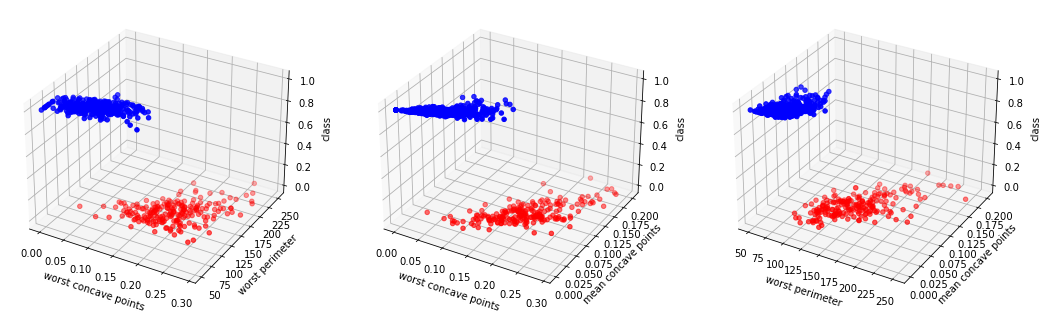

In [15]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(18, 18))
colors = []
for y in Y:
    if y == 0:
        colors.append('r')
    elif y == 1:
        colors.append('b')
        
# Figure 1 (worst concave points, worst perimeter, class)
# XYZ: Number of rows, number of columns, current figure
ax = fig.add_subplot(131, projection = '3d')
ax.scatter(X_WCP, X_WP, Y, c=colors)
ax.set_xlabel("worst concave points")
ax.set_ylabel("worst perimeter")
ax.set_zlabel("class")

# Figure 2 (worst concave points, mean concave points, class)
ax = fig.add_subplot(132, projection = '3d')
ax.scatter(X_WCP, X_MCP, Y, c=colors)
ax.set_xlabel("worst concave points")
ax.set_ylabel("mean concave points")
ax.set_zlabel("class")

# Figure 3 (worst perimeter, mean concave points, class)
ax = fig.add_subplot(133, projection = '3d')
ax.scatter(X_WP, X_MCP, Y, c=colors)
ax.set_xlabel("worst perimeter")
ax.set_ylabel("mean concave points")
ax.set_zlabel("class")

plt.show()


### Training and testing the Logistic Regression models

Now we train our three additional Logistic Regression models as described above. Notice that since in this case we are working with 2 features, we must generate two-column input datasets by concatenating in pairs the previous single-column NumPy arrays `worst concave points`, `worst perimeter`, and `mean concave points`.


In [16]:
# Concatenate X_WCP and X_WP into a NumPy array with 569 rows and 2 columns
X = np.concatenate((X_WCP, X_WP), axis=1)
print("Shape of concatenated list:", X.shape)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1, stratify = Y)

model_4 = linear_model.LogisticRegression()
model_4.fit(X_train, Y_train)

cancer_predval_4 = model_4.predict_proba(X_test)
cancer_pred_4 = model_4.predict(X_test)

mse_4 = mean_squared_error(Y_test, cancer_pred_4)
acc_4 = accuracy_score(Y_test, cancer_pred_4)
prec_4 = precision_score(Y_test, cancer_pred_4)
rec_4 = recall_score(Y_test, cancer_pred_4)
F1_4 = f1_score(Y_test, cancer_pred_4)

print("Logistic Regression Evaluation: Model 4")
print("\tMean Squared Error: ", mse_4)
print("\tAccuracy: ", acc_4)
print("\tPrecision: ", prec_4)
print("\tRecall: ", rec_4)
print("\tF1 score: ", F1_4)


Shape of concatenated list: (569, 2)
Logistic Regression Evaluation: Model 4
	Mean Squared Error:  0.07602339181286549
	Accuracy:  0.9239766081871345
	Precision:  0.9272727272727272
	Recall:  0.9532710280373832
	F1 score:  0.9400921658986175


In [17]:
# Concatenate X_WCP and X_MCP into a NumPy array with 569 rows and 2 columns
X = np.concatenate((X_WCP, X_MCP), axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1, stratify = Y)

model_5 = linear_model.LogisticRegression()
model_5.fit(X_train, Y_train)

cancer_predval_5 = model_5.predict_proba(X_test)
cancer_pred_5 = model_5.predict(X_test)

mse_5 = mean_squared_error(Y_test, cancer_pred_5)
acc_5 = accuracy_score(Y_test, cancer_pred_5)
prec_5 = precision_score(Y_test, cancer_pred_5)
rec_5 = recall_score(Y_test, cancer_pred_5)
F1_5 = f1_score(Y_test, cancer_pred_5)

print("Logistic Regression Evaluation: Model 5")
print("\tMean Squared Error: ", mse_5)
print("\tAccuracy: ", acc_5)
print("\tPrecision: ", prec_5)
print("\tRecall: ", rec_5)
print("\tF1 score: ", F1_5)


Logistic Regression Evaluation: Model 5
	Mean Squared Error:  0.2222222222222222
	Accuracy:  0.7777777777777778
	Precision:  0.7379310344827587
	Recall:  1.0
	F1 score:  0.8492063492063493


In [18]:
# Concatenate X_WP and X_MCP into a NumPy array with 569 rows and 2 columns
X = np.concatenate((X_WP, X_MCP), axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1, stratify = Y)

model_6 = linear_model.LogisticRegression()
model_6.fit(X_train, Y_train)

cancer_predval_6 = model_6.predict_proba(X_test)
cancer_pred_6 = model_6.predict(X_test)

mse_6 = mean_squared_error(Y_test, cancer_pred_6)
acc_6 = accuracy_score(Y_test, cancer_pred_6)
prec_6 = precision_score(Y_test, cancer_pred_6)
rec_6 = recall_score(Y_test, cancer_pred_6)
F1_6 = f1_score(Y_test, cancer_pred_6)

print("Logistic Regression Evaluation: Model 6")
print("\tMean Squared Error: ", mse_6)
print("\tAccuracy: ", acc_6)
print("\tPrecision: ", prec_6)
print("\tRecall: ", rec_6)
print("\tF1 score: ", F1_6)


Logistic Regression Evaluation: Model 6
	Mean Squared Error:  0.07602339181286549
	Accuracy:  0.9239766081871345
	Precision:  0.9272727272727272
	Recall:  0.9532710280373832
	F1 score:  0.9400921658986175


### Visualizing the results

In [19]:
# RESULTS
str_4 = "y=1 / 1 + exp (- (" + str(round(model_4.coef_[0][0], 2)) + \
        "x_1 + " + str(round(model_4.coef_[0][1], 2)) + "x_2 + " + str(round(model_4.intercept_[0], 3)) + "))"

str_5 = "y=1 / 1 + exp (- (" + str(round(model_5.coef_[0][0], 2)) + \
        "x_1 + " + str(round(model_5.coef_[0][1], 2)) + "x_2 + " + str(round(model_5.intercept_[0], 3)) + "))"

str_6 = "y=1 / 1 + exp (- (" + str(round(model_6.coef_[0][0], 2)) + \
        "x_1 + " + str(round(model_6.coef_[0][1], 2)) + "x_2 + " + str(round(model_6.intercept_[0], 3)) + "))"

data = {'Model':['Model 4', 'Model 5', 'Model 6'],
        'Features':['worst concave points & worst perimeter', 'worst concave points & mean concave points', \
                    'worst perimeter & mean concave points'],
        'MSE':[mse_4, mse_5, mse_6],
        'Accuracy':[acc_4, acc_5, acc_6],
        'Precision':[prec_4, prec_5, prec_6],
        'Recall':[rec_4, rec_5, rec_6],
        'F1':[F1_4, F1_5, F1_6],
        'intercept':[model_4.intercept_[0], model_5.intercept_[0], model_6.intercept_[0]],
        'coefficients':[model_4.coef_, model_5.coef_, model_6.coef_],
        'Logistic Function':[str_4, str_5, str_6]
       }

# Create DataFrame
pd.set_option("display.precision", 3)

df_results = pd.DataFrame(data)
df_results


,Model,Features,MSE,Accuracy,Precision,Recall,F1,intercept,coefficients,Logistic Function
0,Model 4,worst concave points & worst perimeter,0.076,0.924,0.927,0.953,0.940,19.809,"[[-1.076407371944376, -0.1792769741737672]]",y=1 / 1 + exp (- (-1.08x_1 + -0.18x_2 + 19.809))
1,Model 5,worst concave points & mean concave points,0.222,0.778,0.738,1.000,0.849,1.526,"[[-6.687252235384992, -3.8411949430937935]]",y=1 / 1 + exp (- (-6.69x_1 + -3.84x_2 + 1.526))
2,Model 6,worst perimeter & mean concave points,0.076,0.924,0.927,0.953,0.940,19.936,"[[-0.18152005842676353, -0.47659381500646036]]",y=1 / 1 + exp (- (-0.18x_1 + -0.48x_2 + 19.936))


## Logistic Regression with all input variables

scikit-learn [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) and [multilabel_confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.multilabel_confusion_matrix.html)

General confusion Matrix

|                      | Predicted Class 1   | Predicted Class 2   |
| :----                | :----:              | :----:              |
| **Actual Class 1**   | True Negative (TN)  | False Positive (FP) |
| **Actual Class 2**   | False Negative (FN) | True Positive (TP)  |


**Malignant class:**

Confusion Matrix:

|                      | Predicted Benign    | Predicted Malignant |
| :----                | :----:              | :----:              |
| **Actual Benign**    |         56          |          8          |
| **Actual Malignant** |          5          |         102         |


\begin{equation}
Precision=\frac{TP}{TP+FP}=\frac{102}{102+8}\simeq0.927
\end{equation}

\begin{equation}
Recall=\frac{TP}{TP+FN}=\frac{102}{102+5}\simeq0.953
\end{equation}

\begin{equation}
F1=\frac{2\cdot Precision \cdot Recall}{Precision + Recall}=\frac{2 \cdot 0.953 \cdot 0.927}{0.953+0.927}\simeq0.939
\end{equation}



**Benign class:**

Confusion Matrix:

|                      | Predicted Malignant | Predicted Benign    |
| :----                | :----:              | :----:              |
| **Actual Malignant** |         102         |          5          |
| **Actual Benign**    |          8          |          56         |

\begin{equation}
Precision=\frac{TP}{TP+FP}=\frac{56}{56+5}\simeq0.918
\end{equation}

\begin{equation}
Recall=\frac{TP}{TP+FN}=\frac{56}{56+8}\simeq0.875
\end{equation}

\begin{equation}
F1=\frac{2\cdot Precision \cdot Recall}{Precision + Recall}=\frac{2 \cdot 0.918 \cdot 0.875}{0.918 + 0.875}\simeq0.896
\end{equation}

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1, stratify = Y)

model_7 = linear_model.LogisticRegression()
model_7.fit(X_train, Y_train)

cancer_predval_7 = model_7.predict_proba(X_test)
cancer_pred_7 = model_7.predict(X_test)

mse_7 = mean_squared_error(Y_test, cancer_pred_7)
acc_7 = accuracy_score(Y_test, cancer_pred_7)
prec_7 = precision_score(Y_test, cancer_pred_7)
rec_7 = recall_score(Y_test, cancer_pred_7)
F1_7 = f1_score(Y_test, cancer_pred_7)

print("=== Logistic Regression Evaluation: Model 7")
print("\tMean Squared Error: ", mse_7)
print("\tAccuracy: ", acc_7)
print("\tPrecision: ", prec_7)
print("\tRecall: ", rec_7)
print("\tF1 score: ", F1_7)

print("\n === Classification Report")
from sklearn.metrics import classification_report
print(classification_report(Y_test, cancer_pred_7, target_names={"Malignant", "Benign"}))

print("\n === Confusion Matrix")
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, cancer_pred_7))

print("\n === Multilabel Confusion Matrix")
from sklearn.metrics import multilabel_confusion_matrix
print(multilabel_confusion_matrix(Y_test, cancer_pred_7))

print("Precision: 102 / (102 + 8)")
print("Recall: 102 / (102 + 5)")


=== Logistic Regression Evaluation: Model 7
	Mean Squared Error:  0.07602339181286549
	Accuracy:  0.9239766081871345
	Precision:  0.9272727272727272
	Recall:  0.9532710280373832
	F1 score:  0.9400921658986175

 === Classification Report
              precision    recall  f1-score   support

   Malignant       0.92      0.88      0.90        64
      Benign       0.93      0.95      0.94       107

    accuracy                           0.92       171
   macro avg       0.92      0.91      0.92       171
weighted avg       0.92      0.92      0.92       171


 === Confusion Matrix
[[ 56   8]
 [  5 102]]

 === Multilabel Confusion Matrix
[[[102   5]
  [  8  56]]

 [[ 56   8]
  [  5 102]]]
Precision: 102 / (102 + 8)
Recall: 102 / (102 + 5)


## Exercises

The [IRIS](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html) dataset is another scikit-learn toy dataset for classification problems. It contains 150 samples (flowers) with 4 features. Each sample-flower may belong to one of three different types of flowers (Setosa, Versicolour, and Virginica).

1. Apply Logistic Regression to the IRIS dataset using all 4 features.
2. Apply Logistic Regression 6 times to the IRIS dataset using one of the six possible feature pairs each time. Which feature pair yields the best results (i.e. highest accuracy)?

Note: This is a multi-class classification problem. `LogisticRegression` will automatically detect the existence of three classes and select the appropriate algorithm for classification.
